# Skoda used car Exploratory Data Analysis

<h3> By Priyanka Roy </h3>

<b> Objectives: </b>

   * Visualize the relation between various features of the dataset.
   * Explore & explain different plots used in this eda.

<b> Plots Used in the analysis: </b>

   * Barplot
   * Scatter plot
   * Regression line
   * Histogram
   * Distribution
   * ECDF (Empirical Cumulative Distribution Function)
   * Boxplot

<h4> Reference(s): </h4>   <br> 
[1] <a href="https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw"> Dataset Source </a> <br>

[2] <a href="https://github.com/priyan-2020/skoda_used_car_analysis/blob/main/skoda.csv"> Skoda .csv file </a>

<h4> Import required libraries and packages </h4>

In [1]:
# required library for data analysis & visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Reading the csv file </h4>

In [2]:
df = pd.read_csv("skoda.csv")

df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5


<h4> Displaying first 5 rows to get a clear conception of numerical and categorical columns of the dataset we found: </h4>

* model, year, transmission and fuelType are the categorical variables;

* price, mileage, mpg and engineSize are the numerical variables.

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
model           6267 non-null object
year            6267 non-null int64
price           6267 non-null int64
transmission    6267 non-null object
mileage         6267 non-null int64
fuelType        6267 non-null object
mpg             6267 non-null float64
engineSize      6267 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


None

<h4> Create a function to count the unique values present in a column</h4>

In [4]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [5]:
model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fuelType_count = unique_val_count(df, 'fuelType')

In [6]:
# sorting the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')

<h4> Create a function named barplot</h4>

In [7]:
def barplot(data, column_x, color, rotation, yticks):
    
    # creating a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.9)
    
    # setting the title for the plot
    plt.title("Number of cars present for each " + column_x, fontsize= 14)
    
    # lebeling x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotation the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # setting up customized range for the yticks
    plt.yticks(yticks)


<h4>Creating final Barplot where each subplot denotes a column</h4>

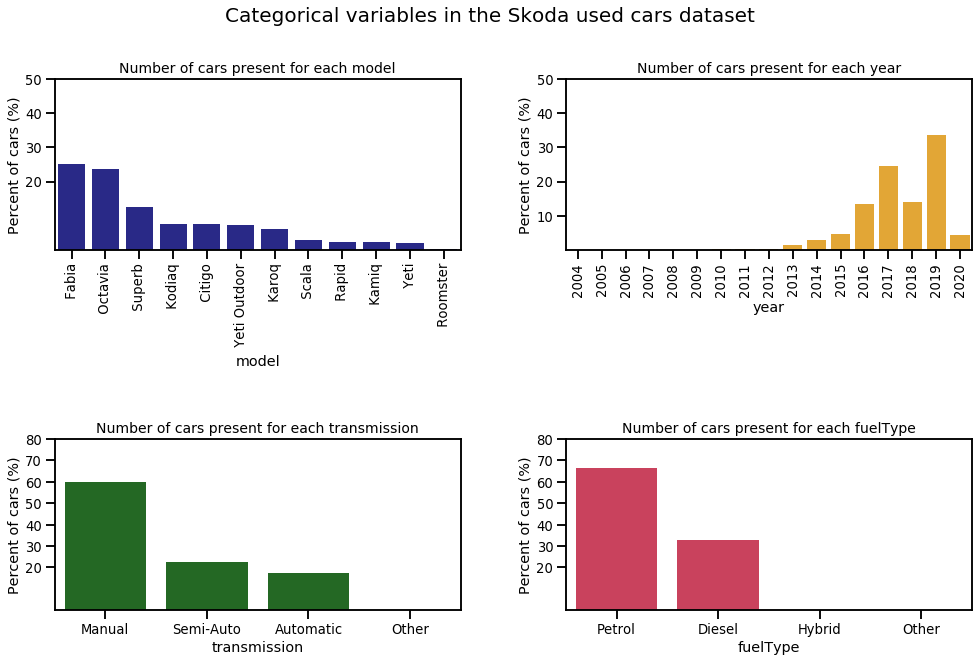

In [8]:
sns.set_context("talk", font_scale= 0.8)
plt.figure(figsize=(15,10))


# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'darkblue', 90, np.arange(20,51,10))


# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(10,51,10))


# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'darkgreen', 0, np.arange(20,81,10))


# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'crimson', 0, np.arange(20,81,10))


# keep the individual plots separate from each other
plt.tight_layout(pad=4)


# heading (super) title for all the plots
plt.suptitle('Categorical variables in the Skoda used cars dataset', fontsize=20, ha="center")
plt.subplots_adjust(top=0.88)


# display the plots
plt.show()

<h4> Remarks: </h4>

This barplot describes the percentage of car availale in the dataset for-

* Each model of Skoda car (<b>Fabia and Octabia in the leading position</b>),
* Released in each year (<b>2019 with the highest percentage</b>), 
* Each type of transmission (<b>Manual > Semi-Auto > Automatic > Others</b>) & 
* FuelType usage (<b>Petrol > Deisel > Hybrid</b>).



<h2>Creating scatterplot and trend line (regression) to visualize the relation between different numerical variables </h2>

* <b>engineSize vs miles per gallon (mpg) and <br>

* mileage vs price </b>

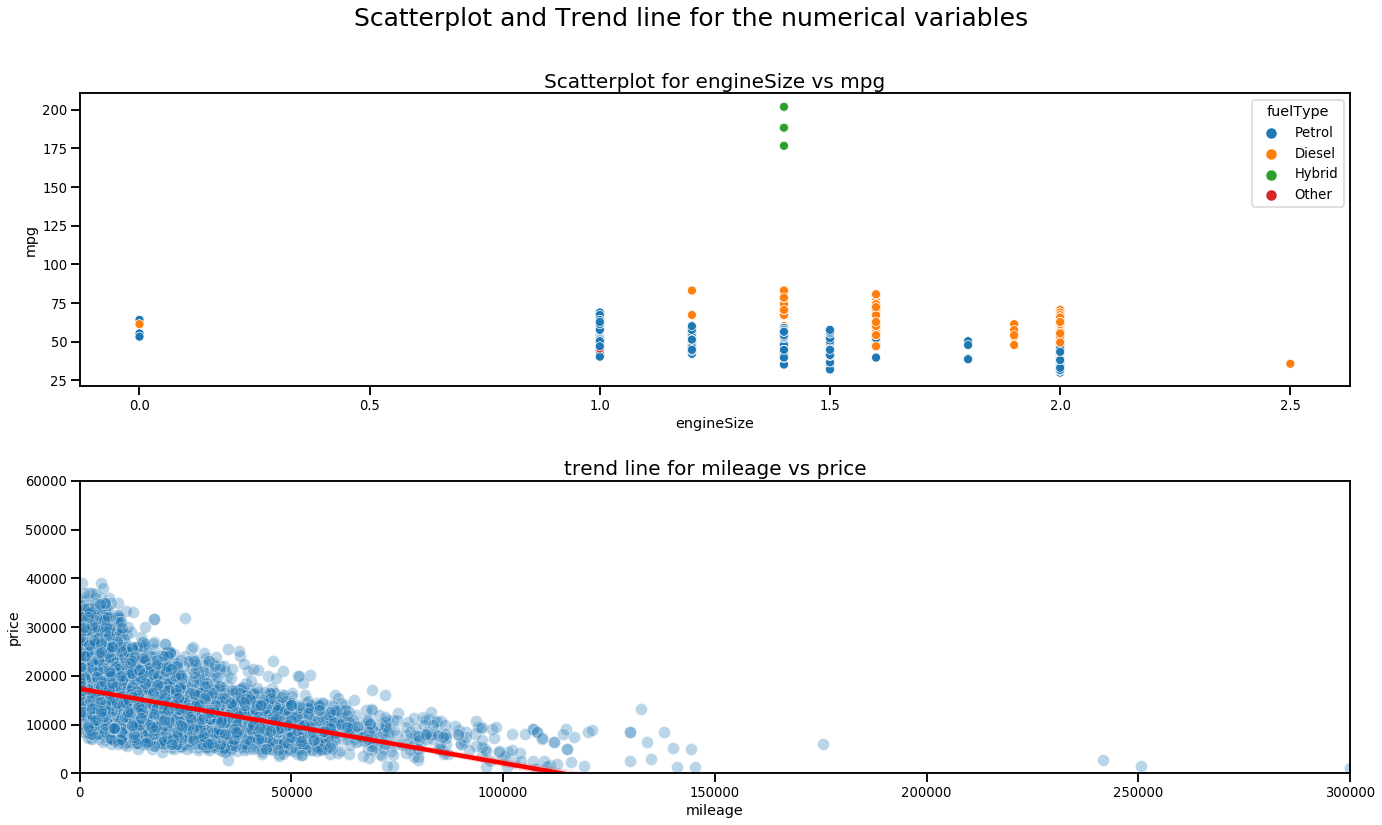

In [9]:
plt.figure(figsize=(20,12))


#engineSize vs mpg
plt.subplot(2,1,1)
sns.scatterplot(x='engineSize', y='mpg', data=df, hue= 'fuelType')
plt.title("Scatterplot for engineSize vs mpg", fontsize= 20)



#trend line for mileage vs price
plt.subplot(2,1,2)
sns.set_context("poster", font_scale = 0.5)
sns.regplot(x='mileage', y='price', data=df, line_kws={'color':'red'}, scatter_kws={'edgecolor':'white', 'alpha': '0.3'})
plt.ylim(0, 60000)
plt.xlim(0,)
plt.title("trend line for mileage vs price", fontsize= 20)



plt.tight_layout(pad= 3)

# Adding title for the plot
plt.suptitle("Scatterplot and Trend line for the numerical variables", fontsize= 25)
plt.subplots_adjust(top=0.88)

plt.show()

<h4>Remarks: </h4> <br>

* From the first plot (position 2,1,1) we can find that, for the same engine size the value of mpg (miles per gallon) flactuates for different type of fuels. Mpg value is higher for Diesel compared to that for Petrol and the highest is for Hybrid type of fuel. 

* While in the second plot (position 2,1,2) we see a trend line denoting an <b>inverse relationship</b> between mileage and price which somewhere hints the negative correlation in between them.

<h2>Creating Histogram and Distribution plot using Seaborn</h2>

In [10]:
df.describe()

,year,price,mileage,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,12.037576,0.394800
min,2004.000000,995.000000,5.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,201.800000,2.500000


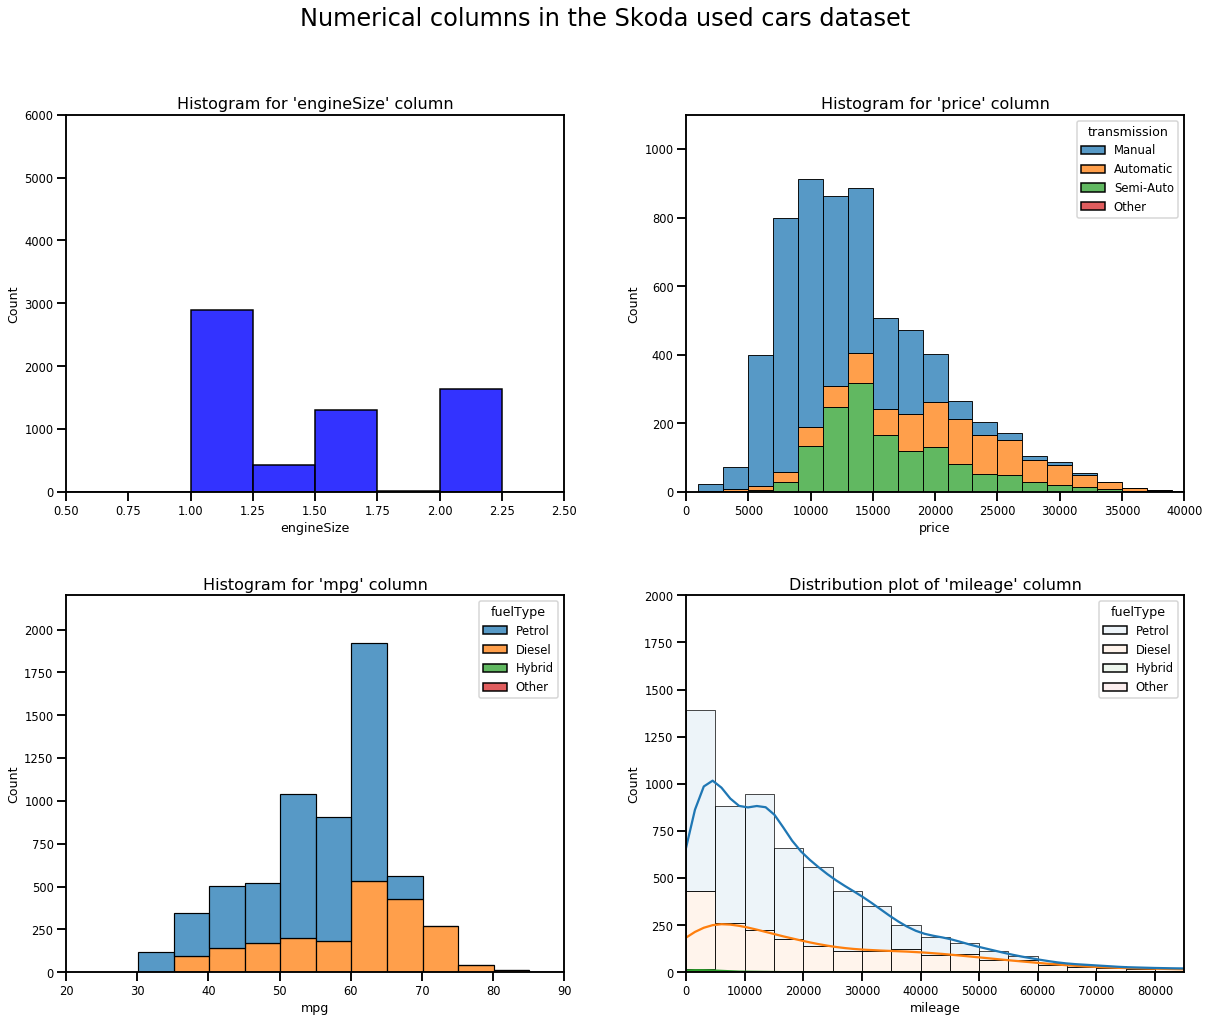

In [11]:
plt.figure(figsize=(18,15))
sns.set_context('talk', font_scale= 0.7)



# position (1,1)- engineSize

plt.subplot(2,2,1)
sns.histplot(data=df, x='engineSize', binwidth= 0.25,  color= 'blue', alpha= 0.8)
plt.title("Histogram for 'engineSize' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(0.5, 2.5)
plt.ylim(0, 6000)



# position (1,2)- price

plt.subplot(2,2,2)
sns.histplot(data=df, x='price', binwidth= 2000,  color= 'orange', hue= 'transmission', multiple="stack")
plt.title("Histogram for 'price' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(0, 40000)
plt.ylim(0, 1100)



# position (2,1)- mpg

plt.subplot(2,2,3)
sns.histplot(data=df, x='mpg', binwidth= 5, hue= 'fuelType', multiple="stack")
plt.title("Histogram for 'mpg' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(20, 90)
plt.ylim(0, 2200)



# position (2,2)- mileage

plt.subplot(2,2,4)
sns.histplot(data=df, x='mileage', color= 'green', alpha= 0.08 , binwidth= 5000, kde= True, hue= 'fuelType', multiple="stack")
# To visualize the distribution lines only
# sns.displot(df, x="mileage", kind="kde", hue= 'fuelType')

plt.title("Distribution plot of 'mileage' column", fontsize= '16')
plt.ylabel("Count")
plt.xlim(0, 85000)
plt.ylim(0, 2000)


# layout and Padding
plt.tight_layout(pad= 4)
plt.subplots_adjust(top=0.88)


#display()
plt.suptitle("Numerical columns in the Skoda used cars dataset", fontsize= '24', ha= 'center')
plt.show()

<h4>Remarks: </h4>

Here we see the histogram for the numerical columns of the dataset respectively where-

- In the first subplot (position 2,2,1) the <b>bimodal histogram </b> figure shows the total number of cars present for a particular range (0.2) of engine size. 


- And in the second subplot (position 2,2,2) the <b>unimodal histogram </b> represents the number of cars present for each type of <b>transmission</b> in each price range.


- In the third subplot (position 2,2,3) we can see an <b>unimodal histogram </b> for the mpg column where the highest count is available for the 60-65 range for fueltype petrol. But the higher rate of mpg can be found for Diesel. We clearly find that, the total count is higher for 'Petrol' but the rate of mpg is always higher for 'Diesel' which demonstrates cars having Diesel as their fuel type are more efficient & powerful with a higher rate of mile(s) per gallon (mpg).


- In the last subplot (position 2,2,4) we see a <b>right-skewed </b> distribution (also known as "positively skewed" distribution) that explains most data falls to the right, or positive side, of the graph's peak. Meaning, the count of cars is gradually decreasing with the higher value of mileage. Again, blue line denoting the count of cars for Petrol which is way higher than the orange line denoting that for Diesel. 


<br>

<h2>ECDF plot for numerical variables </h2>

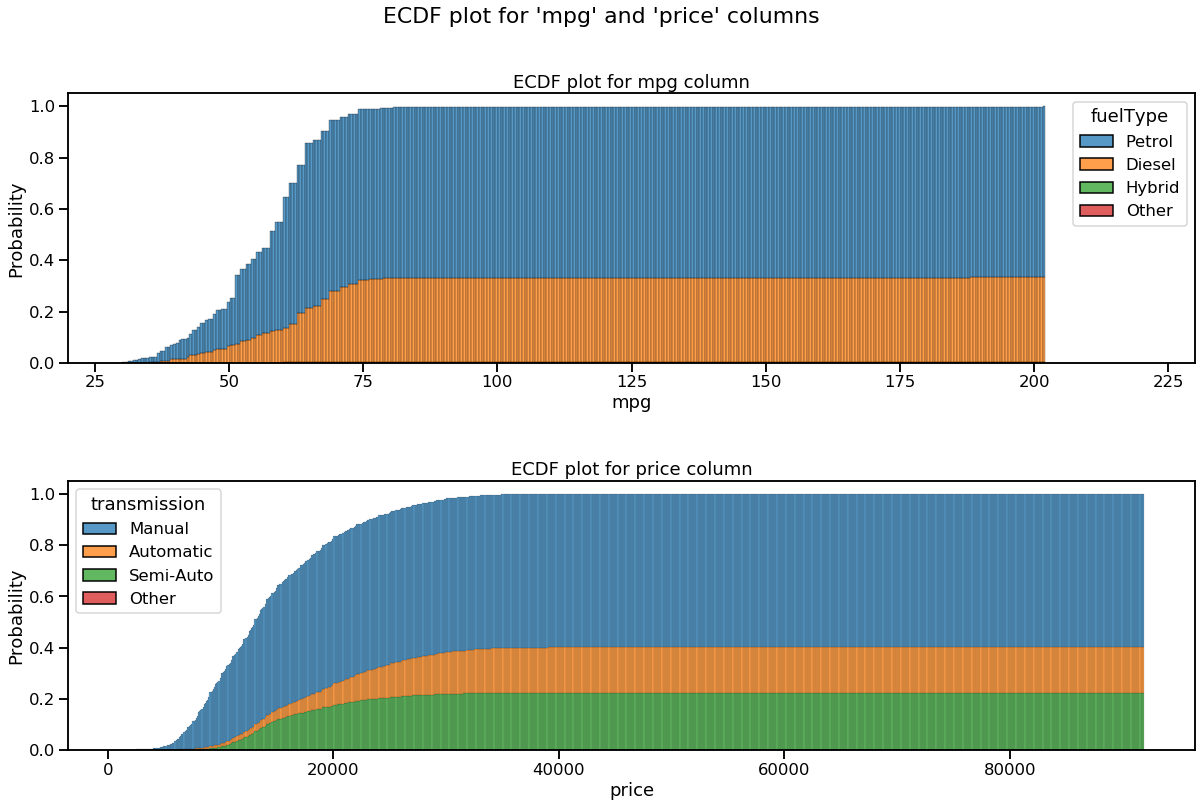

In [12]:
plt.figure(figsize=(18,12))
sns.set_context('talk')


plt.subplot(2,1,1)
sns.histplot(data=df, x='mpg', binwidth= 0.5, cumulative=True , hue= 'fuelType', multiple='stack', stat= 'probability')
plt.xlim(20, 230)
plt.title("ECDF plot for mpg column")


plt.subplot(2,1,2)
sns.histplot(data=df, x='price', binwidth= 100, cumulative=True , hue= 'transmission', multiple="stack", stat="probability")
#sns.ecdfplot(data=df, x="price")
plt.title("ECDF plot for price column")


plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.88)

plt.suptitle("ECDF plot for 'mpg' and 'price' columns", fontsize= 22, ha= 'center')

plt.show()

<h4>Remarks:</h4>

* From this first ECDF (Empirical Cumulative Distribution Function) plot we can easily guess the total counts are higher for petrol type of fuel. It explains that <b>20%</b> of the total number of cars having Petrol as a fuelType has a mpg around 50 and vice versa where percentage of cars having mpg of around 50 for fuelType Diesel is < <b>10% </b>. But as it does not clearly indicates about the change of mpg rate based on 'fuelType' like other two plots (histogram and distribution plot). That's why, using histogram or distribution plot in such kind of cases may be more fruitful than using ECDF plot.


* From the second ECDF plot we find, more than 85% of the manual cars cost less than <b>20,000 </b> currency($) and the price somewhere lies in between <b>5,000-32,000</b> for manual cars where price for automatic cars lies in the range of <b> 10,000 to 40,000</b> currency approximately. 

<h2> Creating Boxplot with seaborn </h2>

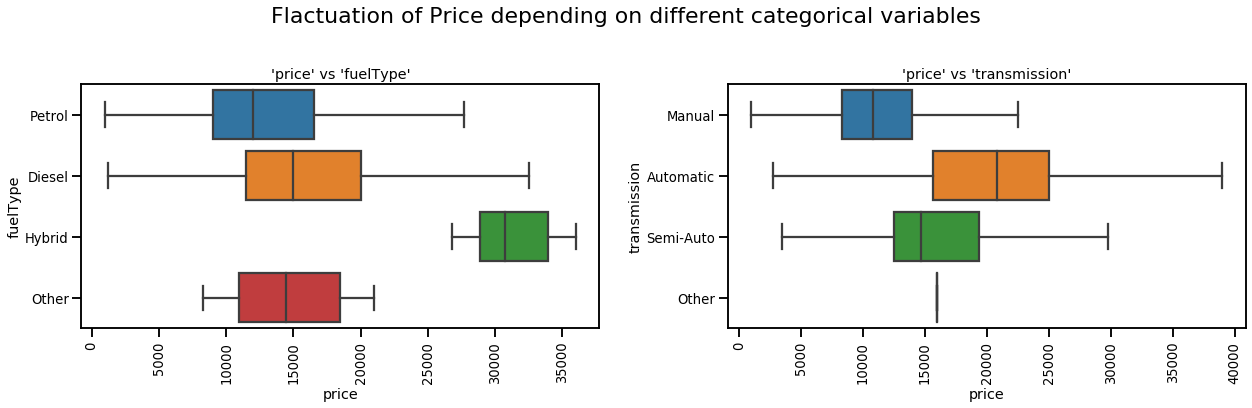

In [232]:
sns.set_context("talk", font_scale= 0.8)
plt.figure(figsize=(18,6))

#position (1,1)
plt.subplot(1,2,1)
sns.boxplot(x=df["price"], y=df["fuelType"], showfliers=False)
plt.xticks(rotation= 90)
plt.title("'price' vs 'fuelType'")


#position(1,2)
plt.subplot(1,2,2)
sns.boxplot(x=df["price"], y=df["transmission"], showfliers=False)
plt.xticks(rotation= 90)
plt.title("'price' vs 'transmission'")


plt.tight_layout(pad=2)
plt.subplots_adjust(top=0.8)


plt.suptitle("Flactuation of Price depending on different categorical variables", fontsize=22, ha='center')
plt.show()

<h4>Remarks:</h4>

* From the first boxplot ('price' vs 'fuelType') we see the average price for cars with <b>Hybrid fuel</b> type is over 30000 which is the highest among all. Besides, average price for <b>Petrol</b> type cars are much lower with value around 12000 and for <b>Diesel</b>- it's in the middle range (15000 approximately).


* Whereas, from the second boxplot ('price' vs 'transmission') we can see the average (mean) price for <b>Automatic </b> cars are leading with the value > 20000. And, average price for <b>Semi-auto & Manual</b> cars are respectively pointing approximately towards 15000 and 12000.